# Read Data

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezaseidgar","key":"87df51df3f17e77c3e0b2e4a2b031614"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 87% 81.0M/93.0M [00:00<00:00, 121MB/s]
100% 93.0M/93.0M [00:00<00:00, 120MB/s]


In [7]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 47.1MB/s]


In [8]:
!ls

apartment-rental-offers-in-germany.zip	mobile-price-classification.zip
kaggle.json				sample_data


In [9]:
!unzip '/content/mobile-price-classification.zip' -d '/content/'

Archive:  /content/mobile-price-classification.zip
  inflating: /content/test.csv       
  inflating: /content/train.csv      


In [10]:
train3 = pd.read_csv('/content/train.csv')
train3.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# PreProcessing

In [23]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   float64
 18  touch_sc

In [24]:
train3.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1


In [25]:
for col in train3.columns :
  if train3[col].dtype == 'int64' or train3[col].dtype == 'float64':
    up = train3[col].mean() + 3*train3[col].std()
    low = train3[col].mean() - 3*train3[col].std()
    mask = (train3[col] > up ) | (train3[col] < low )
    data = train3.drop(train3[mask].index)

In [26]:
y = train3['price_range']

In [27]:
for col in train3.columns :
  if (train3[col].dtype == 'int64' or train3[col].dtype == 'float64') and (col !='price_range'):
    train3[col] = (train3[col] - min(train3[col])) /(max(train3[col]) - min(train3[col]))

In [28]:
train3.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1


In [29]:
print(train3.shape)
print(y.shape)

(2000, 21)
(2000,)


In [30]:
cor_matrix = train3.corr()

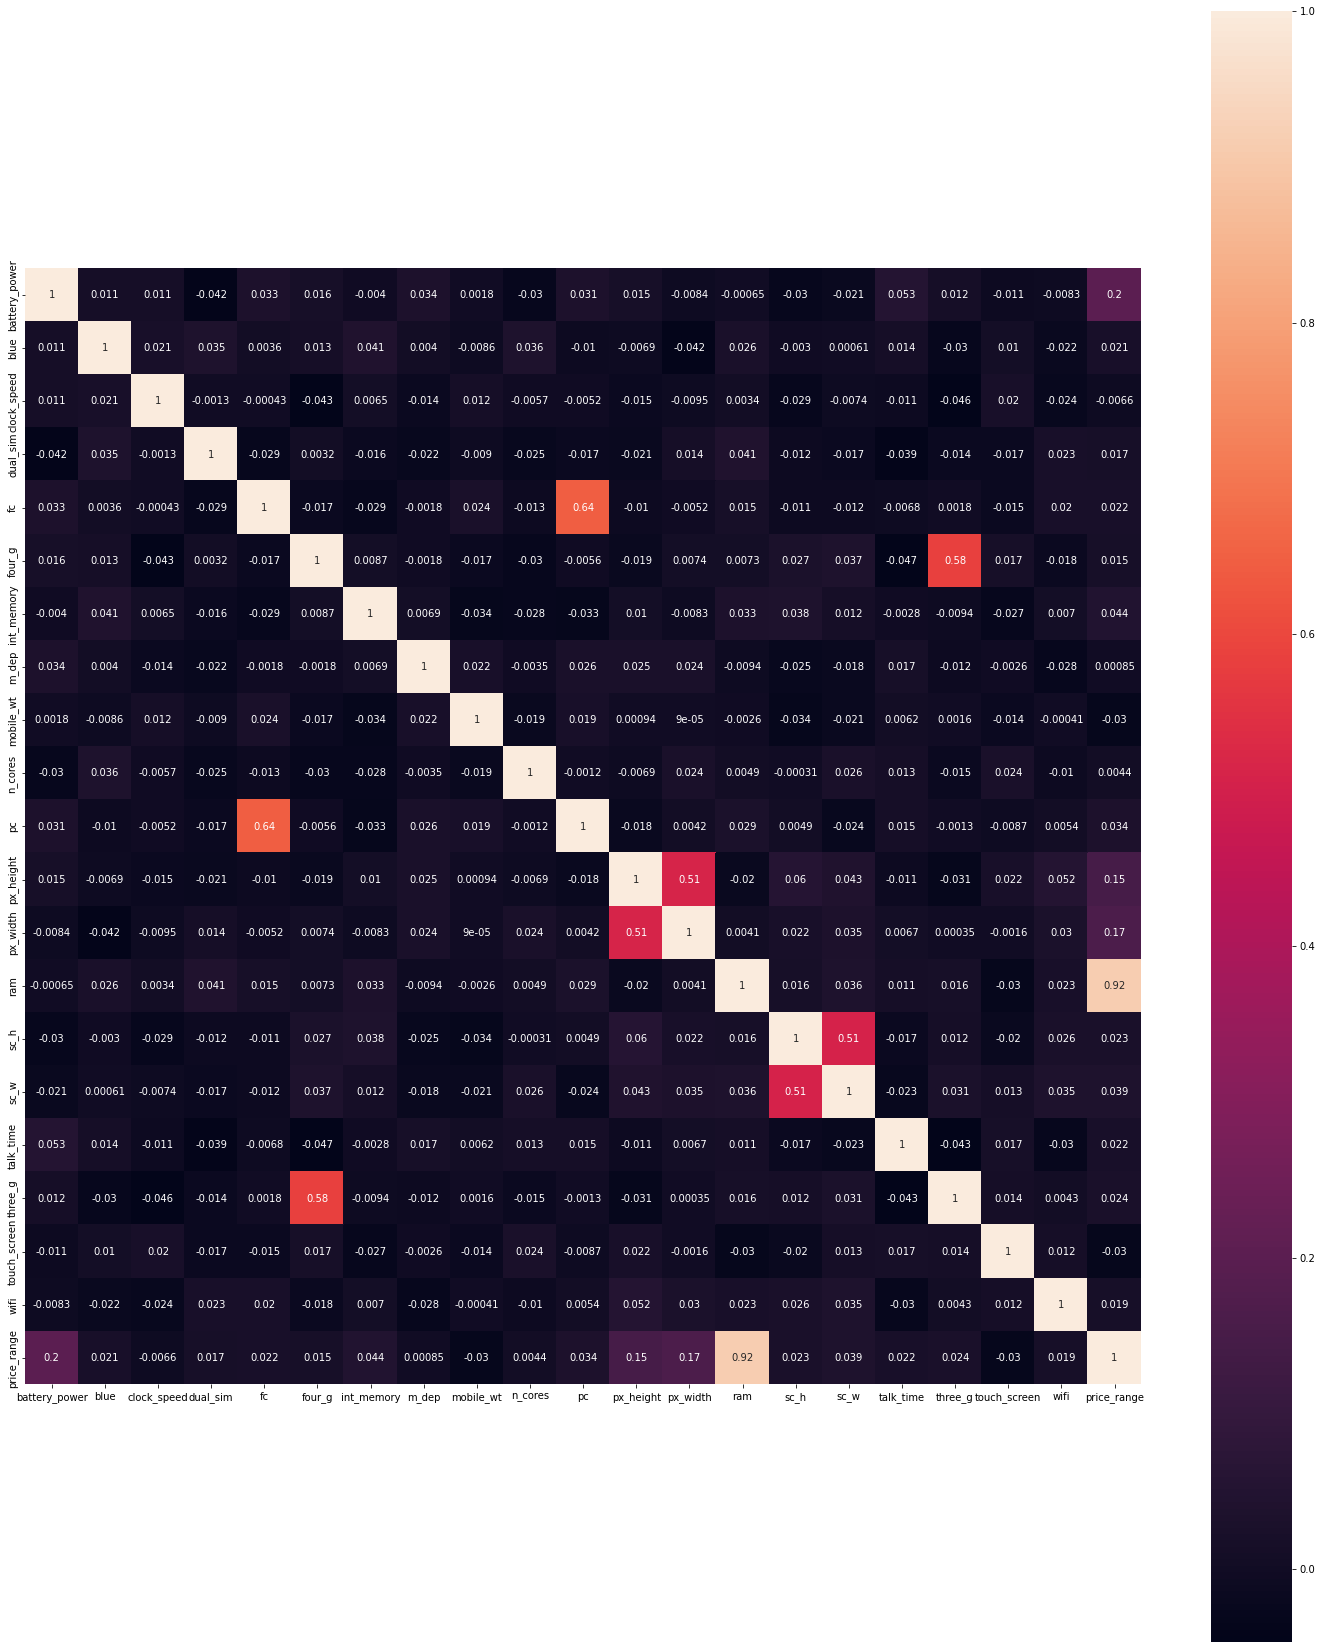

In [31]:
f , ax = plt.subplots(figsize=(25,30))
sns.heatmap(cor_matrix,square=True,annot=True)

In [32]:
x = train3.drop(columns=['price_range'])
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

# Forward Selection

1

In [37]:
from sklearn.metrics import auc
def forward_selection(X, y):
  features = []
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    best_feature = ""
    best_score = 0
    for feature in rem_features:
      new_X = X[features + [feature]]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      logisticRegr = LogisticRegression()
      logisticRegr.fit(X_train, y_train)
      score = logisticRegr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        best_feature = feature
        best_score = score
    rem_features = rem_features.drop(best_feature)
    features.append(best_feature)

    final_features['features'].append(best_feature)
    final_features['scores'].append(best_score)
  final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]
  return final_features

In [38]:
select = forward_selection(x, y)
best_features = select['best_features']
best_features

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram',
 'battery_power',
 'px_height',
 'px_width',
 'sc_h',
 'fc',
 'pc',
 'mobile_wt']

2

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x[best_features], y, test_size=0.2, random_state=42)

lReg = LogisticRegression()
lReg.fit(X_train, y_train)

y_predict = lReg.predict(X_test)

score = lReg.score(X_test, y_test)
print(f'score: {score}')

percision, recall, f1score, support = precision_recall_fscore_support(y_test, lReg.predict(X_test))
print(f'percision: {percision}')
print(f'recall: {recall}')
print(f'f1score: {f1score}' )

score: 0.9675
percision: [0.98130841 0.95652174 0.97647059 0.95689655]
recall: [1.         0.96703297 0.90217391 0.99107143]
f1score: [0.99056604 0.96174863 0.93785311 0.97368421]


# PCA

3

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=8)
x_pca = pca.fit_transform(x)
x_pca.shape

(2000, 8)

4

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [44]:
newlog = LogisticRegression()
newlog.fit(xtrain,ytrain)

LogisticRegression()

In [45]:
ypred = newlog.predict(xtest)
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
1860,0,0
353,2,3
1333,1,0
905,3,2
1289,1,3


In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[55 28 19 49]
 [57 26 18 45]
 [56 25 24 43]
 [38 27 25 65]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.27      0.36      0.31       151
           1       0.25      0.18      0.21       146
           2       0.28      0.16      0.21       148
           3       0.32      0.42      0.36       155

    accuracy                           0.28       600
   macro avg       0.28      0.28      0.27       600
weighted avg       0.28      0.28      0.27       600



# SVM

6

In [50]:
from sklearn.svm import SVC

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [56]:
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.85

In [57]:
y_pred = svm.predict(xtest)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[139  12   0   0]
 [ 12 120  14   0]
 [  0  23 116   9]
 [  0   0  20 135]]


7

In [62]:
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.9316666666666666

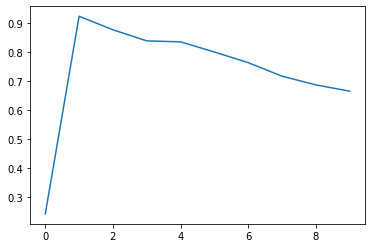

In [63]:
plotting = []
for i in range(10):
  svm = SVC(kernel='poly',degree=i)
  svm.fit(x_train,y_train)
  plotting.append((svm.score(x_test,y_test)))
plt.plot(plotting)
plt.show()

In [64]:
svm = SVC(decision_function_shape='ovo')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.85

In [65]:
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.865

# Feature Engeenier

9 A

In [66]:
dataall5 = pd.read_csv('/content/train.csv')
dataall5.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [67]:
min(dataall5['battery_power'])

501

In [68]:
max(dataall5['battery_power'])

1998

In [69]:
bins = [500,875.25,1249.5,1623.75,1999]

In [70]:
group_name = ['bad','medium','good','nice']

In [71]:
dataall5['quality of battery'] = pd.cut(dataall5['battery_power'],bins,labels=group_name)

9 B

In [72]:
cate_features = []
cate_features.append('quality of battery')
cate_features

['quality of battery']

In [73]:
dum_features = pd.get_dummies(dataall5[cate_features])
dum_features.head()

,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1


In [74]:
dataall5 = pd.concat([dataall5,dum_features],axis=1)
dataall5.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,quality of battery,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice
0,842,0,2.2,0,1,0,7,0.6,188,2,...,19,0,0,1,1,bad,1,0,0,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,7,1,1,0,2,medium,0,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,9,1,1,0,2,bad,1,0,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,11,1,0,0,2,bad,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,15,1,1,0,1,nice,0,0,0,1


In [75]:
dataall5 = dataall5.drop(columns=cate_features)
dataall5.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice
0,842,0,2.2,0,1,0,7,0.6,188,2,...,7,19,0,0,1,1,1,0,0,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,3,7,1,1,0,2,0,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2,9,1,1,0,2,1,0,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,8,11,1,0,0,2,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,2,15,1,1,0,1,0,0,0,1


9 C

In [76]:
data5C = pd.read_csv('/content/train.csv')
data5C.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [77]:
datalog = data5C.transform(np.log)
datalog.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,6.735780,-inf,0.788457,-inf,0.000000,-inf,1.945910,-0.510826,5.236442,0.693147,...,2.995732,6.628041,7.843456,2.197225,1.945910,2.944439,-inf,-inf,0.0,0.000000
1,6.928538,0.0,-0.693147,0.0,-inf,0.0,3.970292,-0.356675,4.912655,1.098612,...,6.807935,7.594884,7.875119,2.833213,1.098612,1.945910,0.0,0.0,-inf,0.693147
2,6.333280,0.0,-0.693147,0.0,0.693147,0.0,3.713572,-0.105361,4.976734,1.609438,...,7.141245,7.447751,7.864420,2.397895,0.693147,2.197225,0.0,0.0,-inf,0.693147
3,6.421622,0.0,0.916291,-inf,-inf,-inf,2.302585,-0.223144,4.875197,1.791759,...,7.103322,7.487734,7.926242,2.772589,2.079442,2.397895,0.0,-inf,-inf,0.693147
4,7.507141,0.0,0.182322,-inf,2.564949,0.0,3.784190,-0.510826,4.948760,0.693147,...,7.096721,7.100027,7.252054,2.079442,0.693147,2.708050,0.0,0.0,-inf,0.000000


In [78]:
dataexp = data5C.transform(np.exp)
dataexp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,inf,1.000000,9.025013,1.000000,2.718282,1.000000,1.096633e+03,1.822119,4.439792e+81,7.389056,...,4.851652e+08,inf,inf,8.103084e+03,1096.633158,1.784823e+08,1.000000,1.000000,2.718282,2.718282
1,inf,2.718282,1.648721,2.718282,1.000000,2.718282,1.041376e+23,2.013753,1.158910e+59,20.085537,...,inf,inf,inf,2.415495e+07,20.085537,1.096633e+03,2.718282,2.718282,1.000000,7.389056
2,3.219536e+244,2.718282,1.648721,2.718282,7.389056,2.718282,6.398435e+17,2.459603,9.390741e+62,148.413159,...,inf,inf,inf,5.987414e+04,7.389056,8.103084e+03,2.718282,2.718282,1.000000,7.389056
3,1.233407e+267,2.718282,12.182494,1.000000,1.000000,1.000000,2.202647e+04,2.225541,7.808671e+56,403.428793,...,inf,inf,inf,8.886111e+06,2980.957987,5.987414e+04,2.718282,1.000000,1.000000,7.389056
4,inf,2.718282,3.320117,1.000000,442413.392009,2.718282,1.285160e+19,1.822119,1.719974e+61,7.389056,...,inf,inf,inf,2.980958e+03,7.389056,3.269017e+06,2.718282,2.718282,1.000000,2.718282


9 D

In [79]:
data5D = pd.read_csv('/content/train.csv')
data5D.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [80]:
data5D['Area'] = data5D['px_height']* data5D['px_width']

In [81]:
dataall5['Area'] = dataall5['px_height']* dataall5['px_width']

In [82]:
data5D.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Area
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1464096


In [83]:
dataall5.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice,Area
0,842,0,2.2,0,1,0,7,0.6,188,2,...,19,0,0,1,1,1,0,0,0,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,7,1,1,0,2,0,1,0,0,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,...,9,1,1,0,2,1,0,0,0,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,...,11,1,0,0,2,1,0,0,0,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,15,1,1,0,1,0,0,0,1,1464096


10

In [84]:
for col in data5D.columns :
  if (data5D[col].dtype == 'int64' or data5D[col].dtype == 'float64') and (col !='price_range'):
    data5D[col] = (data5D[col] - min(data5D[col])) /(max(data5D[col]) - min(data5D[col]))

In [85]:
x = data5D.drop(columns=['price_range'])
y = data5D['price_range']

In [86]:
data5D.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Area
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1,0.003891
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2,0.462943
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2,0.557678
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2,0.558828
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1,0.376732


In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.8466666666666667

In [88]:
for col in dataall5.columns :
  if (dataall5[col].dtype == 'int64' or dataall5[col].dtype == 'float64') and (col !='price_range'):
    dataall5[col] = (dataall5[col] - min(dataall5[col])) /(max(dataall5[col]) - min(dataall5[col]))

In [89]:
x = dataall5.drop(columns=['price_range'])
y = dataall5['price_range']

In [90]:
dataall5.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice,Area
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.944444,0.0,0.0,1.0,1,1,0,0,0,0.003891
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.277778,1.0,1.0,0.0,2,0,1,0,0,0.462943
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.388889,1.0,1.0,0.0,2,1,0,0,0,0.557678
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.500000,1.0,0.0,0.0,2,1,0,0,0,0.558828
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.722222,1.0,1.0,0.0,1,0,0,0,1,0.376732


In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.81

# DecisionTree

12

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train,y_train)
print(dtc.score(x_test,y_test))

0.8116666666666666


13

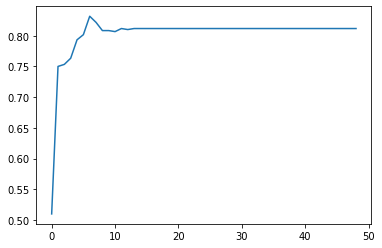

In [94]:
plotting= []
for i in range(1,50,1):
  dtc = DecisionTreeClassifier(max_depth=i,random_state=42)
  dtc.fit(x_train,y_train)
  plotting.append((dtc.score(x_test,y_test)))
plt.plot(plotting)
plt.show()

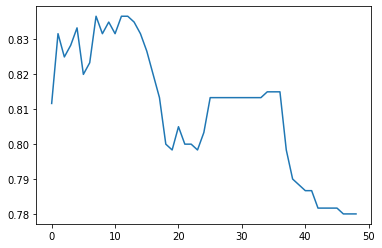

In [95]:
plotting= []
for i in range(1,50,1):
  dtc = DecisionTreeClassifier(min_samples_leaf=i,random_state=42)
  dtc.fit(x_train,y_train)
  plotting.append(dtc.score(x_test,y_test))
plt.plot(plotting)

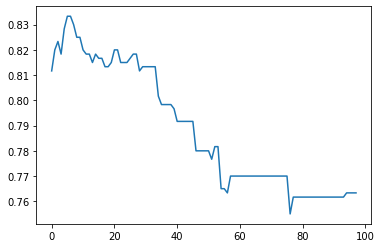

In [96]:
plotting = []
for i in range(2,100,1):
  dtc = DecisionTreeClassifier(min_samples_split=i,random_state=42)
  dtc.fit(x_train,y_train)
  plotting.append((dtc.score(x_test,y_test)))
plt.plot(plotting)

In [97]:
min(plotting)
k = 0
for i in plotting:
  if i == max(plotting):
    print(k)
    break
  k = k+1

5


In [98]:
min(plotting)

0.755

In [99]:
max(plotting)


0.8333333333333334